# ShareGPT Dataset

We se the dataset from https://huggingface.co/datasets/anon8231489123/ShareGPT_Vicuna_unfiltered 

In [3]:
%pwd

'/home/daniel/Documents/llm-testbed/data/notebooks'

In [4]:
import json
import numpy as np
import torch
from transformers import AutoTokenizer

import os 
import sys

sys.path.append(os.path.join(os.getcwd(), "../../"))

import src.visualization.plot_rawdata as plotutils

In [5]:
SHAREGPT_PATH = "../raw_instruct/ShareGPT_V3_unfiltered_cleaned_split.json"
# Open the JSON file
with open(SHAREGPT_PATH, 'r') as file:
    data = json.load(file)  # Load the JSON data into a Python dictionary

In [6]:
data[2]

{'id': 'A5AbcES_0',
 'conversations': [{'from': 'human',
   'value': 'In Java, I want to replace string like "This is a new {object} at {place}" with a Map, {object: "student", "point 3, 4"}, and get a result "This is a new student at point 3, 4". How can I do?'},
  {'from': 'gpt',
   'value': 'You can use the `String.format()` method in Java to replace placeholders in a string with values from a map. Here\'s an example code snippet that demonstrates how you can achieve this:\n```java\nimport java.util.HashMap;\nimport java.util.Map;\n\npublic class StringReplaceExample {\n    public static void main(String[] args) {\n        String input = "This is a new {object} at {place}";\n        Map<String, String> replacements = new HashMap<>();\n        replacements.put("object", "student");\n        replacements.put("place", "point 3, 4");\n\n        String output = replacePlaceholders(input, replacements);\n        System.out.println(output);\n    }\n\n    public static String replacePlaceho

In [7]:
len(data)

94145

In [8]:
len(data)

94145

### No data
There are some elements in the origanl ShareGPT dataset that have no elements.

In [9]:
no_conver_data = []

for elem in data: 
    if not len(elem['conversations']):
        no_conver_data.append(elem)

In [10]:
len(no_conver_data)


550

In [11]:
no_conver_data[0]

{'id': 'ZUkSe7V_0', 'conversations': []}

In [12]:
del no_conver_data

#### Only samples starting with 'human'
we do not want to bias the LLMs with ChatGPT-produced content.

In [13]:
data_humanstart = list()
for elem in data:
    if len(elem['conversations']) and elem['conversations'][0]['from']=="human":
        data_humanstart.append(elem)

In [14]:
len(data_humanstart)

58827

In [15]:
search_str ="Question: Can you provide a brief summary of the main filters and final columns in SQL code which I will add"
idx = 0
for i, elem in enumerate(data_humanstart): 
    if search_str in elem['conversations'][0]['value']:
        cached_elem = elem
        idx = i

In [16]:
cached_elem['conversations'][0:3]

[{'from': 'human',
  'value': 'Question: Can you provide a brief summary of the main filters and final columns in SQL code which I will add?\n\nThis question should prompt a response that includes a description of any filters used to narrow down the data and the final columns selected for display. It can be used as a general template for documenting SQL code.'},
 {'from': 'gpt',
  'value': 'Certainly! A typical SQL code will often include filters and the selection of final columns. Here’s a brief summary of these elements:\nFilters:\n* Filters are used to narrow down the data in a table based on specific conditions. These conditions can be defined using various SQL operators such as “WHERE”, “AND”, “OR”, “NOT”, and “BETWEEN”. For example, you might filter a table to show only records where the “age” column is greater than 18, or where the “status” column is “active”.\nFinal columns:\n* Final columns refer to the columns selected for'},
 {'from': 'human',
  'value': "Question: Can you p

#### Plot conversations lengths (by human-GPT interactions)

In [17]:
conv_len = [len(elem['conversations']) for elem in data_humanstart]

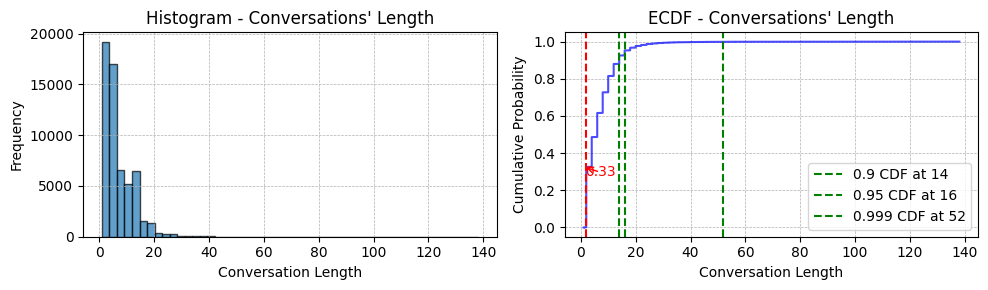

In [18]:
fig = plotutils.plot_histogram_and_cdf(conv_len, in_size=(10, 3), x_forcdf=1, cdf_forx=[0.9, 0.95, 0.999], in_xlabel="Conversation Length")

In [16]:
max(conv_len)

138

In [17]:
fig.savefig("../../outputs/images/raw_data_shareGPT_hist.pdf", bbox_inches="tight")

### Input Handling

In [19]:
access_tk = os.getenv("HF_API_TOKEN")
device_str = "cuda:0"
model_name = "meta-llama/Llama-3.2-3B-Instruct"
padding_side='left'

tokenizer = AutoTokenizer.from_pretrained(model_name, token=access_tk, device_map=device_str, torch_dtype=torch.float16, padding_side=padding_side)


In [20]:
def get_tokens(sentence, tokenizer):
    return tokenizer.apply_chat_template(sentence, return_tensors="pt", add_generation_prompt=True)   

In [21]:
from src.data.rawdata_processor import sharegpt_generate_simple_rawprompt_text

In [22]:
mystring = sharegpt_generate_simple_rawprompt_text(data_humanstart[idx], tokenizer, truncate=False)
print(mystring)

Question: Can you provide a brief summary of the main filters and final columns in SQL code which I will add?

This question should prompt a response that includes a description of any filters used to narrow down the data and the final columns selected for display. It can be used as a general template for documenting SQL code.


In [23]:
from src.data.rawdata_processor import build_rawprompt_text_chat, build_rawprompt_text_batch

In [24]:
build_rawprompt_text_chat(mystring)

[{'role': 'user',
  'content': 'Question: Can you provide a brief summary of the main filters and final columns in SQL code which I will add?\n\nThis question should prompt a response that includes a description of any filters used to narrow down the data and the final columns selected for display. It can be used as a general template for documenting SQL code.'}]

In [25]:
get_tokens(build_rawprompt_text_chat(mystring), tokenizer)

tensor([[128000, 128006,   9125, 128007,    271,  38766,   1303,  33025,   2696,
             25,   6790,    220,   2366,     18,    198,  15724,   2696,     25,
            220,    605,   3297,    220,   2366,     20,    271, 128009, 128006,
            882, 128007,    271,  14924,     25,   3053,    499,   3493,    264,
          10015,  12399,    315,    279,   1925,  13711,    323,   1620,   8310,
            304,   8029,   2082,    902,    358,    690,    923,   1980,   2028,
           3488,   1288,  10137,    264,   2077,    430,   5764,    264,   4096,
            315,    904,  13711,   1511,    311,  15376,   1523,    279,    828,
            323,    279,   1620,   8310,   4183,    369,   3113,     13,   1102,
            649,    387,   1511,    439,    264,   4689,   3896,    369,  68071,
           8029,   2082,     13, 128009, 128006,  78191, 128007,    271]])

In [26]:
print(tokenizer.decode(get_tokens(build_rawprompt_text_batch(mystring, 5), tokenizer)[0]))

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 10 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Question: Can you provide a brief summary of the main filters and final columns in SQL code which I will add?

This question should prompt a response that includes a description of any filters used to narrow down the data and the final columns selected for display. It can be used as a general template for documenting SQL code.<|eot_id|><|start_header_id|>assistant<|end_header_id|>




### Analyze COMPLETE DATASET lenght of prompts in terms of number of tokens

In [35]:
tmp_model_input = [build_rawprompt_text_chat(sharegpt_generate_simple_rawprompt_text(elem, tokenizer, truncate=False)) for elem in data_humanstart]

In [36]:
len(tmp_model_input)

58827

In [37]:
conv_len_tokens = [get_tokens(elem, tokenizer).shape[1] for elem in tmp_model_input]

Token indices sequence length is longer than the specified maximum sequence length for this model (161306 > 131072). Running this sequence through the model will result in indexing errors


In [38]:
len(conv_len_tokens)

58827

In [39]:
np.max(conv_len_tokens)

np.int64(161306)

In [40]:
conv_len_tokens[123]

1833

In [43]:
import importlib
importlib.reload(plotutils)

<module 'src.visualization.plot_rawdata' from '/home/daniel/Documents/llm-testbed/data/notebooks/../../src/visualization/plot_rawdata.py'>

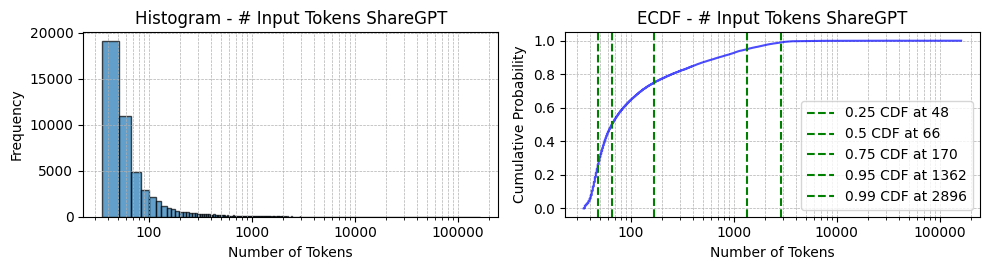

In [51]:
fig = plotutils.plot_histogram_and_cdf(conv_len_tokens, in_size=(10, 2.8), 
                                       in_title="# Input Tokens ShareGPT", n_bins=10000, 
                                       x_forcdf=0, cdf_forx=[0.25, 0.5, 0.75, 0.95, 0.99], logx=True)

In [52]:
fig.savefig("../../outputs/images/raw_data_shareGPT_COMPLETE_ntokens_hist.pdf", bbox_inches="tight")

# Split the datasets

#### Take maximum 2000 samples

In [53]:
SEED = 42
MAXIMUM = 2000

In [54]:
np.random.seed(SEED)

In [55]:
tmp = np.arange(len(data_humanstart))
np.random.shuffle(tmp)

In [56]:
idx_subset = min(MAXIMUM, len(data_humanstart))
tmp = tmp[0:idx_subset]
print(f"SELECTING {len(tmp)} samples randomly from dataset")

SELECTING 2000 samples randomly from dataset


In [57]:
train_indxs, val_indxs, test_indxs = np.split(tmp, [int(0.7*len(tmp)), int(0.9*len(tmp))])

In [58]:
print(f"Selecting {len(train_indxs)} training, {len(val_indxs)} validation, and {len(test_indxs)} test samples")

Selecting 1400 training, 400 validation, and 200 test samples


In [59]:
data_train = [data_humanstart[i] for i in train_indxs]
data_val = [data_humanstart[i] for i in val_indxs]
data_test = [data_humanstart[i] for i in test_indxs]

In [60]:
# Check if the lengths agree
print(f"Percentage of training data: {round(len(data_train)/len(data_humanstart), 4)}")
print(f"Percentage of validation data: {round(len(data_val)/len(data_humanstart), 4)}")
print(f"Percentage of test data: {round(len(data_test)/len(data_humanstart), 4)}")

Percentage of training data: 0.0238
Percentage of validation data: 0.0068
Percentage of test data: 0.0034


### Analyze TRIMMED DATASET lenght of prompts in terms of number of tokens

In [61]:
tmp_model_input = [build_rawprompt_text_chat(sharegpt_generate_simple_rawprompt_text(elem, tokenizer)) for elem in [data_humanstart[k] for k in tmp]]

Prompt text length exceeds maximum limit of 2500 tokens. Truncarting prompt.
Prompt text length exceeds maximum limit of 2500 tokens. Truncarting prompt.
Prompt text length exceeds maximum limit of 2500 tokens. Truncarting prompt.
Prompt text length exceeds maximum limit of 2500 tokens. Truncarting prompt.
Prompt text length exceeds maximum limit of 2500 tokens. Truncarting prompt.
Prompt text length exceeds maximum limit of 2500 tokens. Truncarting prompt.
Prompt text length exceeds maximum limit of 2500 tokens. Truncarting prompt.
Prompt text length exceeds maximum limit of 2500 tokens. Truncarting prompt.
Prompt text length exceeds maximum limit of 2500 tokens. Truncarting prompt.
Prompt text length exceeds maximum limit of 2500 tokens. Truncarting prompt.
Prompt text length exceeds maximum limit of 2500 tokens. Truncarting prompt.
Prompt text length exceeds maximum limit of 2500 tokens. Truncarting prompt.
Prompt text length exceeds maximum limit of 2500 tokens. Truncarting prompt.

In [62]:
len(tmp_model_input)

2000

In [63]:
conv_len_tokens = [get_tokens(elem, tokenizer).shape[1] for elem in tmp_model_input]

In [64]:
len(conv_len_tokens)

2000

In [80]:
print(f"MEAN: {np.mean(conv_len_tokens)}\nMIN: {np.min(conv_len_tokens)},\nMAX: {np.max(conv_len_tokens)}")
print(*[f"P{p}: {v:.2f}" for p, v in zip([25, 50, 75, 99], np.percentile(conv_len_tokens, [25, 50, 75, 99]))])

MEAN: 260.527
MIN: 36,
MAX: 2534
P25: 48.00 P50: 64.00 P75: 168.00 P99: 2534.00


In [66]:
conv_len_tokens[123]

42

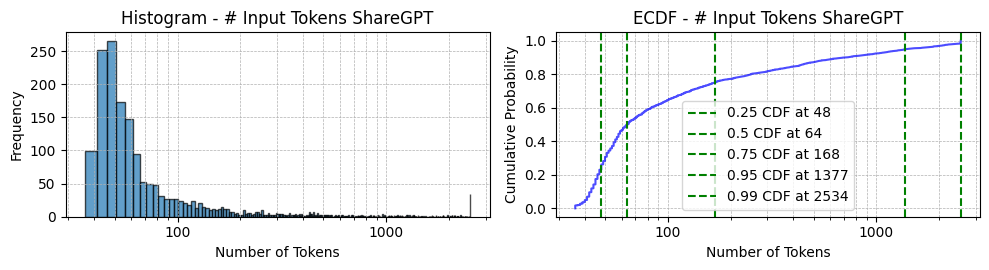

In [72]:
fig = plotutils.plot_histogram_and_cdf(conv_len_tokens, in_size=(10, 2.8), 
                                       in_title="# Input Tokens ShareGPT", n_bins=500, 
                                       x_forcdf=0, cdf_forx=[0.25, 0.5, 0.75, 0.95, 0.99], logx=True)

In [73]:
fig.savefig("../../outputs/images/raw_data_shareGPT_ntokens_hist.pdf", bbox_inches="tight")

## Save the dataset

In [91]:
def save_data(dataset, path):
    with open(path, 'w') as f:
        json.dump(dataset, f)
    print(f"Dataset saved to path {path}")

In [92]:
save_data(data_train, "../raw_instruct/ShareGPT/raw_ShareGPT_train.json")

Dataset saved to path ../raw_instruct/ShareGPT/raw_ShareGPT_train.json


In [93]:
save_data(data_val, "../raw_instruct/ShareGPT/raw_ShareGPT_validate.json")

Dataset saved to path ../raw_instruct/ShareGPT/raw_ShareGPT_validate.json


In [94]:
save_data(data_test, "../raw_instruct/ShareGPT/raw_ShareGPT_test.json")

Dataset saved to path ../raw_instruct/ShareGPT/raw_ShareGPT_test.json
